In [20]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\ievas\anaconda3\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plotting']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:


def om(img,filtersize):
        img = lt.local_thresholding_mean(img, 50, filtersize)
        return img

def oc(img,filtersize):
        img = lt.local_thresholding_counts(img, 300, filtersize, 0.5)
        return img

def m(img, filtersize):
        img=scipy.ndimage.median_filter(img, filtersize)
        return img

def g(img, filtersize):
        img=scipy.ndimage.gaussian_filter(img, filtersize)
        return img
        
def s(img,filtersize):
        img=pp.stretch(img)
        return img


    #functions = [om, oc, m, g, s]#
def process(image_list, function, filtersize):
        list = []
        
        for i in range(0,len(image_list)):
                list.append(function(image_list[i], filtersize))

        return list



def dscs(img_list, gt_list):
        list=[]
        for j in range(0,len(img_list)):
                list.append(dsc.dice(img_list[j],gt_list[j]))
        return list

def bestdsc(list1,list2):
        if median(list1)>=median(list2):
                list=list1
        else:
                list=list2
        return list
def better_dsc(list1, list2):
        if bestdsc(list1, list2)==list1:
                name='mean'
        else:
                name='counts'
        return name

In [31]:
def complete_analysis_local_otsu(dataset):
    if dataset == "N2DH-GOWT1":
        img = []
        path = r"data/Otsu_data/N2DH-GOWT1/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/N2DH-GOWT1/gt"
        for f in os.listdir(path):
            gt.append(pp.binarize(imread(os.path.join(path , f))))
        
        mfiltersize = 9
        gfiltersize=9
       
        
    if dataset == "N2DL_HeLa":

        img = []
        path = r"data/Otsu_data/N2DL-HeLa/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/N2DL-HeLa/gt"
        for f in os.listdir(path):
            gt.append(pp.binarize(imread(os.path.join(path , f))))
        
        mfiltersize=2
        gfiltersize=4
        framesize=300


    if dataset == "NIH3T3":
        img = []
        path = r"data/Otsu_data/NIH3T3/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/NIH3T3/gt"
        for f in os.listdir(path):
            gt.append(imread(os.path.join(path , f)))

        mfiltersize=16
        gfiltersize=8
        framesize=150

    print(framesize)

    m_img = process(img,m, mfiltersize)
    print('m done')
    g_img = process(img,g,gfiltersize)
    print('g done')
    s_img = process(img,s,1)
    print('s done')
    sm_img = process(s_img,m,mfiltersize)
    print('sm done')
    sg_img = process(g_img,g,gfiltersize)
    print('sg done')
    om_img = process(img,om,framesize)
    print('om done')
    print(len(om_img))
    #oc_img = process(img,oc,framesize)
    print('oc done')
    #print(len(oc_img))
    mom = process(m_img,om,framesize)
    print('mom done')
    #moc = process(m_img,oc,framesize)
    print('moc done')
    gom = process(g_img,om,framesize)
    print('gom done')
    #goc = process(g_img,oc,framesize)
    print('goc done')
    som = process(s_img, om, framesize)
    print('som done')
    #soc = process(s_img, oc, framesize)
    print('soc done')
    smom = process(sm_img,om,framesize)
    print('smom done')
    #smoc = process(sm_img,oc,framesize)
    print('smoc done')
    sgom = process(sg_img,om,framesize)
    print('sgom done')
    #sgoc = process(sg_img,oc,framesize)
    print('sgoc done')

    #processed_list=[gt,om_img,oc_img,mom,moc,gom,goc,som,soc,smom,smoc,sgom,sgoc, dataset]
    processed_list=[gt,om_img,mom,gom,som,smom,sgom,dataset]

    return processed_list

def dices(imglist):
    #dice score for o, mo,go,so,smo,sgo...:
    gt=imglist[0]
    gtlist=[]
    for i in range(0,len(gt)):
        gtlist.append(pp.binarize(gt[i]))

    list=[]
    i=1
    #while i < len(imglist)-2:
        #list.append(bestdsc(dscs(imglist[i], gtlist), dscs(imglist[i+1], gtlist)))
        #print(better_dsc(dscs(imglist[i], gtlist), (imglist[i+1], gtlist)))
        #i+=2

    while i<len(imglist)-1:
        list.append(dscs(imglist[i], gtlist))
        i+=1

    
    #data=[bestdsc(dscs(,gt),dscs(oc_img,gt)),bestdsc(dscs(mom, gt), dscs(moc, gt)), bestdsc(dscs(gom, gt), dscs(goc, gt)), bestdsc(dscs(som, gt), dscs(soc,gt)), bestdsc(dscs(smom,gt), dscs(smoc,gt)), bestdsc(dscs(sgom,gt), dscs(sgoc,gt))]
    #print('dscs done')
    #print(better_dsc(dscs(om_img,gt),dscs(oc_img,gt)), better_dsc(dscs(mom, gt), dscs(moc, gt)), better_dsc(dscs(gom, gt), dscs(goc, gt)), better_dsc(dscs(som, gt), dscs(soc,gt)), better_dsc(dscs(smom,gt), dscs(smoc,gt)), better_dsc(dscs(sgom,gt), dscs(sgoc,gt)))
    data=list
    return data

def boxplots(imglist):

       #dice score for o, mo,go,so,smo,sgo...:
    gt=imglist[0]
    gtlist=[]
    for i in range(0,len(gt)):
        gtlist.append(pp.binarize(gt[i]))

    list=[]
    i=1
    #while i < len(imglist)-2:
        #list.append(bestdsc(dscs(imglist[i], gtlist), dscs(imglist[i+1], gtlist)))
        #print(better_dsc(dscs(imglist[i], gtlist), (imglist[i+1], gtlist)))
        #i+=2

    while i<len(imglist)-1:
        list.append(dscs(imglist[i], gtlist))
        i+=1

    
    #data=[bestdsc(dscs(,gt),dscs(oc_img,gt)),bestdsc(dscs(mom, gt), dscs(moc, gt)), bestdsc(dscs(gom, gt), dscs(goc, gt)), bestdsc(dscs(som, gt), dscs(soc,gt)), bestdsc(dscs(smom,gt), dscs(smoc,gt)), bestdsc(dscs(sgom,gt), dscs(sgoc,gt))]
    #print('dscs done')
    #print(better_dsc(dscs(om_img,gt),dscs(oc_img,gt)), better_dsc(dscs(mom, gt), dscs(moc, gt)), better_dsc(dscs(gom, gt), dscs(goc, gt)), better_dsc(dscs(som, gt), dscs(soc,gt)), better_dsc(dscs(smom,gt), dscs(smoc,gt)), better_dsc(dscs(sgom,gt), dscs(sgoc,gt)))
    data=list

    boxplot_heading = 'Preprocessing methods - ' + imglist[-1]



    boxplot = pp.dataset_boxplot_otsu(data , boxplot_heading)
    return boxplot

   

    

    
    


    
    

    






In [28]:
image = imread(r'data/Otsu_data/NIH3T3/img/dna-0.png')
lt.local_thresholding_mean(image,50,150)
print('yeet')

yeet


In [32]:
comp2=complete_analysis_local_otsu("NIH3T3")


150
m done
g done
s done
sm done
sg done
om done
18
oc done


c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:94: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])


mom done
moc done
gom done
goc done
som done
soc done
smom done
smoc done
sgom done
sgoc done


[[0.8360405998943934, 0.8586713648254943, 0.8530443098501753, 0.8177741282363493, 0.8399953520799442, 0.7654859679125818, 0.7626226465340046, 0.8117507395585859, 0.6133732199011787, 0.8168652812886423, 0.6705802157983013, 0.8324854215161623, 0.7741625333494337, 0.852313800900949, 0.8629962943356273, 0.7509333394598693, 0.7822342384515624, 0.8543158427409453], [0.648027510867795, 0.6735160929054876, 0.8594389095517252, 0.8193132123154465, 0.8413159834812786, 0.7651337174507434, 0.7673017616223016, 0.8111191972262652, 0.6228345392860359, 0.8186237024145417, 0.6993818037827463, 0.8371225745005335, 0.7657893790350135, 0.8526310951517515, 0.8608968328629665, 0.7592169279481041, 0.7963897325364946, 0.8544344979009261], [0.8962200307300733, 0.8989426460160811, 0.8695025495900206, 0.8302464955644342, 0.8451077044130257, 0.7706547534712384, 0.7650140326704611, 0.8237449636207865, 0.6310487817255204, 0.8276915418863927, 0.6989571319504232, 0.8449742531134451, 0.7528605141584013, 0.85615053666965

c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


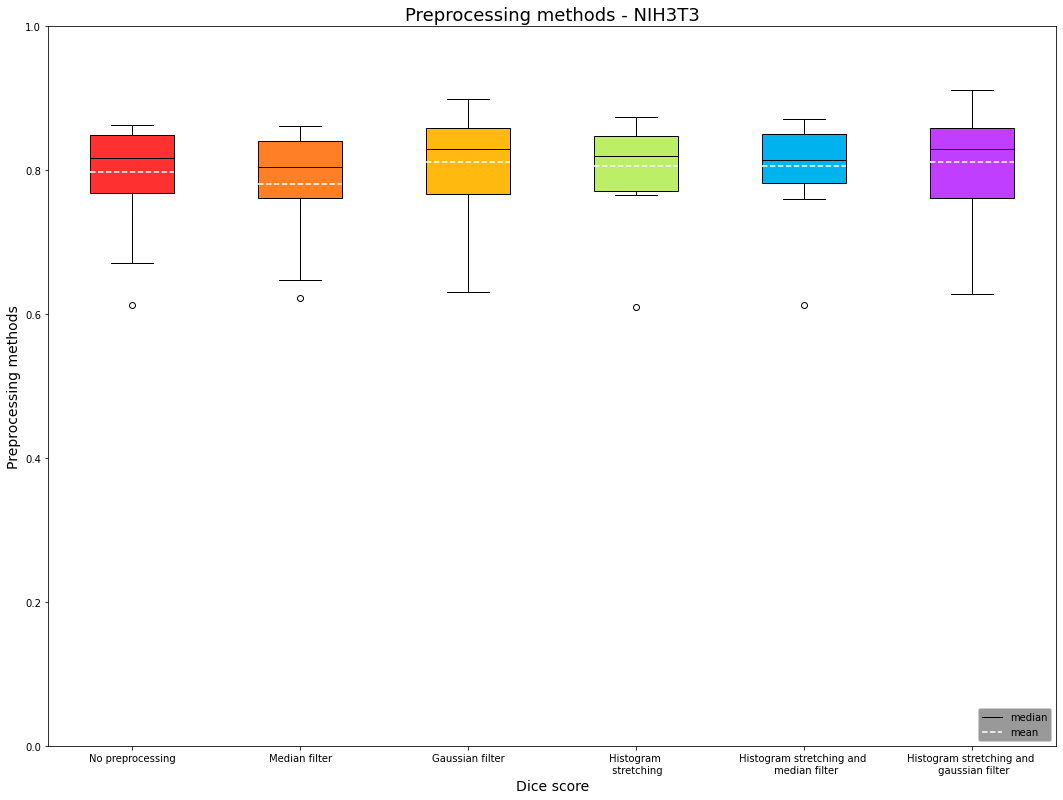

In [33]:
print(dices(comp2))
boxplots(comp2)

dice scores NIH3T3
- [[0.8360405998943934, 0.8586713648254943, 0.8530443098501753, 0.8177741282363493, 0.8399953520799442, 0.7654859679125818, 0.7626226465340046, 0.8117507395585859, 0.6133732199011787, 0.8168652812886423, 0.6705802157983013, 0.8324854215161623, 0.7741625333494337, 0.852313800900949, 0.8629962943356273, 0.7509333394598693, 0.7822342384515624, 0.8543158427409453], [0.648027510867795, 0.6735160929054876, 0.8594389095517252, 0.8193132123154465, 0.8413159834812786, 0.7651337174507434, 0.7673017616223016, 0.8111191972262652, 0.6228345392860359, 0.8186237024145417, 0.6993818037827463, 0.8371225745005335, 0.7657893790350135, 0.8526310951517515, 0.8608968328629665, 0.7592169279481041, 0.7963897325364946, 0.8544344979009261], [0.8962200307300733, 0.8989426460160811, 0.8695025495900206, 0.8302464955644342, 0.8451077044130257, 0.7706547534712384, 0.7650140326704611, 0.8237449636207865, 0.6310487817255204, 0.8276915418863927, 0.6989571319504232, 0.8449742531134451, 0.7528605141584013, 0.8561505366696526, 0.8763713293266667, 0.7599872900016538, 0.8034472654887425, 0.8600522692503825], [0.8421300498519737, 0.8743258892015092, 0.8497771352849054, 0.82481326588688, 0.8277184741976791, 0.7652556444112221, 0.7839976957834036, 0.8374803303796848, 0.6095192725842279, 0.8015904688266448, 0.7663976071863642, 0.8144494476383614, 0.766391339541255, 0.856452244919524, 0.8569971999613788, 0.7659680222327839, 0.7964881411925239, 0.8554899183971788], [0.8138529659139917, 0.8708399030323575, 0.8579168484910713, 0.8265330285721963, 0.8298658817713034, 0.7670961560308923, 0.7919058986727575, 0.83809070881561, 0.6129186723455732, 0.8032843988954079, 0.7651030963655677, 0.8148343334101878, 0.7596045922968061, 0.8563841648768236, 0.8543625331963479, 0.7791690412620692, 0.8111341828194034, 0.8541022838760732], [0.909851734525395, 0.9117883553247301, 0.8642202159617313, 0.8311333937141283, 0.8420626200068814, 0.7710455256051921, 0.7590575059124861, 0.8182634981946427, 0.6282697486177428, 0.8273864920561058, 0.7128379428216284, 0.8400582412248973, 0.7435017953802454, 0.8594178859443339, 0.8761816046626265, 0.7522463087392705, 0.806145953898524, 0.8588434821780346]]

In [24]:
comp=complete_analysis_local_otsu("N2DL_HeLa")


300
m done
g done


KeyboardInterrupt: 

In [ ]:
print(comp)
i=0
while i<4:
    figure()
    imshow(comp[1][i], 'gray')
    figure()
    imshow(comp[0][i],'gray')
    i+=1



[[0.6820204135043182, 0.7413784799152298, 0.7815872335613054, 0.775443777352338], [0.6952966995137484, 0.7495932062474019, 0.7850233734160468, 0.780257914755402], [0.758215868705826, 0.7679578369083377, 0.7556851932300763, 0.7555001612950526], [0.8113053613053613, 0.8412021869898211, 0.8056148916692096, 0.8024038655355713], [0.8098539100544256, 0.8413827288204996, 0.8078548688897104, 0.8063821812316849], [0.7489350716406351, 0.7502828810665131, 0.743012280058651, 0.746261883692964]]


c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


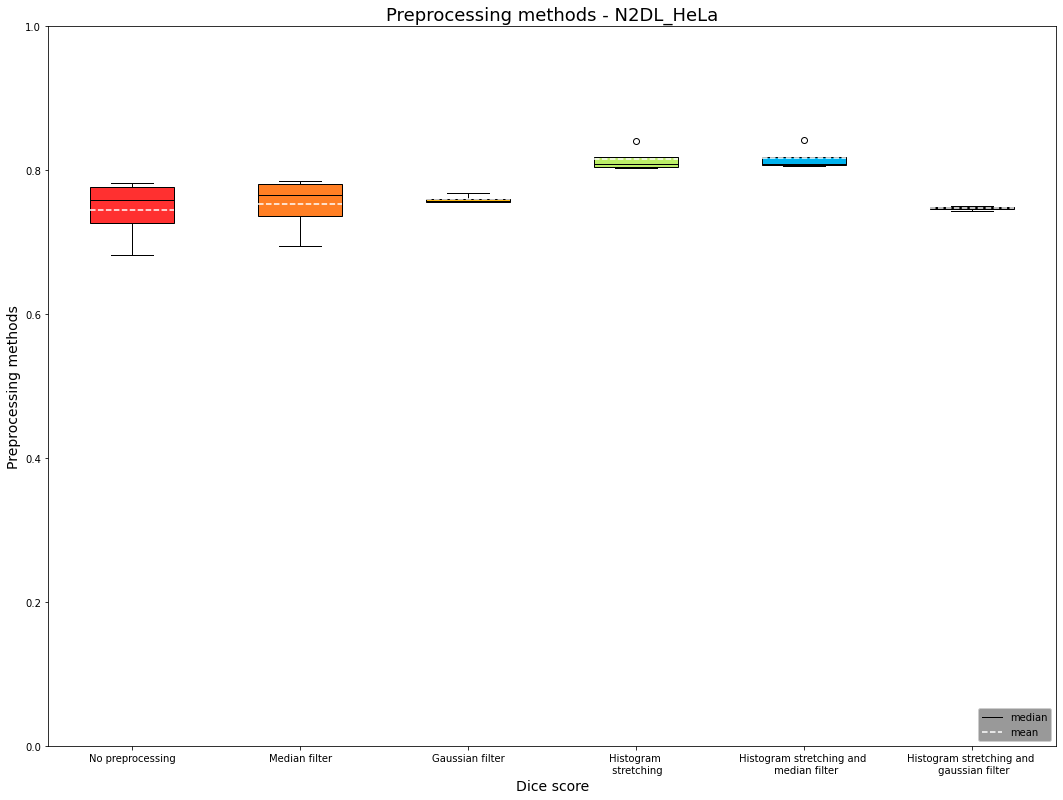

In [19]:
print(dices(comp))
boxplots(comp)

Dice score output for HeLa (just in case the output deletes)

- [[0.6820204135043182, 0.7413784799152298, 0.7815872335613054, 0.775443777352338], [0.6952966995137484, 0.7495932062474019, 0.7850233734160468, 0.780257914755402], [0.758215868705826, 0.7679578369083377, 0.7556851932300763, 0.7555001612950526], [0.8113053613053613, 0.8412021869898211, 0.8056148916692096, 0.8024038655355713], [0.8098539100544256, 0.8413827288204996, 0.8078548688897104, 0.8063821812316849], [0.7489350716406351, 0.7502828810665131, 0.743012280058651, 0.746261883692964]]

In [ ]:
from nuclei_segmentation import two_level_local_thresholding as tllt

dataset1_example = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
d1_tllt_c = tllt.two_level_local_thresholding_counts(dataset1_example,50,200,0.5)


In [ ]:
d1_tllt_m = tllt.two_level_local_thresholding_mean(dataset1_example,50,200)

In [ ]:
dataset2_example = imread(r"data/Otsu_data/N2DL-HeLa/img/t13.tif")
d2_tllt_c = tllt.two_level_local_thresholding_counts(dataset2_example,50,200,0.5)


NameError: name 'tllt' is not defined

In [ ]:
d2_tllt_m = tllt.two_level_local_thresholding_mean(dataset2_example,50,200)

In [ ]:
dataset3_example = imread(r"data/Otsu_data/NIH3T3/img/dna-32.png")
d3_tllt_c = tllt.two_level_local_thresholding_counts(dataset3_example50,200,0.5)


In [ ]:
d3_tllt_m = tllt.two_level_local_thresholding_mean(dataset3_example,50,200)